Logistic regression >> https://michael-fuchs-python.netlify.app/2019/11/15/multinomial-logistic-regression/

https://www.askpython.com/python/examples/fitting-a-logistic-regression-model

In [ ]:
from google.colab import files
uploaded = files.upload()#"standardizedallstats.csv"

Saving standardizedallstats.csv to standardizedallstats.csv


In [ ]:
from google.colab import files
uploaded = files.upload()#"mergedstats2022.csv"

Saving mergedstats2022.csv to mergedstats2022.csv


In [ ]:
from google.colab import files
uploaded = files.upload()#"standardizedtest2022.csv"

Saving standardizedtest2022.csv to standardizedtest2022.csv


In [ ]:
import pandas as pd
newdf = pd.read_csv("standardizedallstats.csv", encoding="latin-1", delimiter=",")
newdf15 = newdf[newdf['Year'] >= 2007] #15 years
#newdf = df[df['Year'] >= 2012] #10 years
newdf = newdf15.reset_index()
newdf


,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Player,Pos,Age,Tm,G,GS,...,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank,MVP
0,6829,6829,0,-1.428326,A.J. Hammons,C,-0.554215,DAL,-1.279530,-0.881347,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.527129,0,0
1,6830,6830,1,-1.428099,Ben Bentil,PF,-1.244852,DAL,-2.044464,-0.881347,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-5.835876,0,0
2,6831,6831,2,-1.427872,DeAndre Liggins,SG,0.366635,DAL,0.330859,-0.219692,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.433768,0,0
3,6832,6832,3,-1.427645,Devin Harris,PG,1.517696,DAL,0.451638,-0.881347,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,0.269501,0,0
4,6833,6833,4,-1.427418,Dirk Nowitzki,PF,2.668758,DAL,0.008781,0.999146,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.018536,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7258,14087,14087,453,1.831852,Mike Dunleavy,SG-PF,-0.091724,IND,1.113670,0.769627,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.302459,0,0
7259,14088,14088,454,1.832122,Orien Greene,SG,-0.555920,IND,-0.563355,-0.933388,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.908281,0,0
7260,14089,14089,455,1.832391,Rawle Marshall,SG,-0.555920,IND,-0.604258,-0.863877,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.480678,0,0
7261,14090,14090,456,1.832660,Shawne Williams,SG,-1.484312,IND,-0.358839,-0.829121,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.202020,0,0


In [ ]:
import pandas as pd #stats used for creating a table at the end, NOT FOR PREDICTION
stats2022 = pd.read_csv("mergedstats2022.csv", encoding="latin-1", delimiter=",")

In [ ]:
import pandas as pd
test1 = pd.read_csv("standardizedtest2022.csv", encoding="latin-1", delimiter=",")
test1['TS%'] = test1['TS%'].fillna(0)
#test1

In [ ]:
player_list = newdf.Player
index_list = newdf.index
zip_player_index = zip(index_list, player_list)
dict_player_index = dict(zip_player_index)
#dict_player_index

In [ ]:
year_list = newdf.Year
zip_year_index = zip(index_list, year_list)
dict_year_index = dict(zip_year_index)
#dict_year_index

In [ ]:
team_list = newdf.Tm
zip_team_index = zip(index_list, team_list)
dict_team_index = dict(zip_team_index)
#dict_team_index

In [ ]:
newdf

,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Player,Pos,Age,Tm,G,GS,...,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank,MVP
0,6829,6829,0,-1.428326,A.J. Hammons,C,-0.554215,DAL,-1.279530,-0.881347,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.527129,0.0,0
1,6830,6830,1,-1.428099,Ben Bentil,PF,-1.244852,DAL,-2.044464,-0.881347,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-5.835876,0.0,0
2,6831,6831,2,-1.427872,DeAndre Liggins,SG,0.366635,DAL,0.330859,-0.219692,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.433768,0.0,0
3,6832,6832,3,-1.427645,Devin Harris,PG,1.517696,DAL,0.451638,-0.881347,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,0.269501,0.0,0
4,6833,6833,4,-1.427418,Dirk Nowitzki,PF,2.668758,DAL,0.008781,0.999146,...,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.018536,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7258,14087,14087,453,1.831852,Mike Dunleavy,SG-PF,-0.091724,IND,1.113670,0.769627,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.302459,0.0,0
7259,14088,14088,454,1.832122,Orien Greene,SG,-0.555920,IND,-0.563355,-0.933388,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.908281,0.0,0
7260,14089,14089,455,1.832391,Rawle Marshall,SG,-0.555920,IND,-0.604258,-0.863877,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.480678,0.0,0
7261,14090,14090,456,1.832660,Shawne Williams,SG,-1.484312,IND,-0.358839,-0.829121,...,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.202020,0.0,0


In [ ]:
#newdf.info()

In [ ]:
newdf.columns

Index(['index', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Player',
       'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Pts Won',
       'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G',
       'SRS', 'TS%', 'Rank', 'MVP'],
      dtype='object')

In [ ]:
categorical = [val for val in newdf.columns[newdf.dtypes == "O"]]
categorical

['Player', 'Pos', 'Tm', 'Team']

# remove player column value on player too because it doesn't play the role.

In [ ]:
#newdf = newdf.drop(["Player"], axis =1 )
#newdf

In [ ]:
indexTest_list = test1.index
player_list = test1.Player
zip_player_index22 = zip(indexTest_list, player_list)
dict_player_index22 = dict(zip_player_index22)
#dict_player_index22

In [ ]:
newdf.Pos.unique()

array(['C', 'PF', 'SG', 'PG', 'SF', 'PF-C', 'PF-SF', 'PG-SG', 'SG-SF',
       'SF-SG', 'SG-PF', 'SG-PG', 'C-PF', 'SF-PF', 'SF-C'], dtype=object)

# Shift column MVP to the first column

In [ ]:
first_column = newdf.pop('MVP')
  
# insert column using insert(position,column_name,
# first_column) function
newdf.insert(0, 'MVP', first_column)
df = newdf.rename(columns={'TS_percent':'TS%'})

df

,MVP,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Player,Pos,Age,Tm,G,...,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,TS%,Rank
0,0,6829,6829,0,-1.428326,A.J. Hammons,C,-0.554215,DAL,-1.279530,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.527129,0
1,0,6830,6830,1,-1.428099,Ben Bentil,PF,-1.244852,DAL,-2.044464,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-5.835876,0
2,0,6831,6831,2,-1.427872,DeAndre Liggins,SG,0.366635,DAL,0.330859,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.433768,0
3,0,6832,6832,3,-1.427645,Devin Harris,PG,1.517696,DAL,0.451638,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,0.269501,0
4,0,6833,6833,4,-1.427418,Dirk Nowitzki,PF,2.668758,DAL,0.008781,...,Dallas Mavericks,-0.703571,0.703571,-0.706557,1.064889,-1.872876,-1.230109,-0.587617,-0.018536,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7258,0,14087,14087,453,1.831852,Mike Dunleavy,SG-PF,-0.091724,IND,1.113670,...,Indiana Pacers,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.302459,0
7259,0,14088,14088,454,1.832122,Orien Greene,SG,-0.555920,IND,-0.563355,...,Indiana Pacers,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.908281,0
7260,0,14089,14089,455,1.832391,Rawle Marshall,SG,-0.555920,IND,-0.604258,...,Indiana Pacers,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,-0.480678,0
7261,0,14090,14090,456,1.832660,Shawne Williams,SG,-1.484312,IND,-0.358839,...,Indiana Pacers,-0.539712,0.539712,-0.537997,0.472111,-0.766293,-0.165552,-0.676847,0.202020,0


Remove dependent variables  >> pts won, pts max,share and rank

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#df.info()

we want to only look at these features

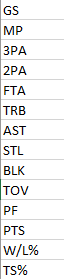

# Waiting for some more features to be removed.

In [ ]:
#split train/test
#X = df.drop(["G","MP","FG","FGA","FG%","eFG%","3P","3P%","2P","2P%","FT","FT%","ORB","DRB","Year","MVP","Pts Won","Tm","Pos","Pts Max","Share","W","L","GB","Rank","PS/G","PA/G"], axis = 1)
y = df.MVP
X = df[["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"]]
X.dtypes

Age     float64
GS      float64
3PA     float64
2PA     float64
FTA     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
W/L%    float64
SRS     float64
TS%     float64
dtype: object

In [ ]:
indexTest_list = test1.index
player_list = test1.Player
zip_player_index22 = zip(indexTest_list, player_list)
dict_player_index22 = dict(zip_player_index22)
dict_player_index22
player22list = list(dict_player_index22.values())

# feature importance >> https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

model.feature_importances_
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='barh')
#plt.show()

array([0.03899308, 0.05518165, 0.04191367, 0.08049646, 0.11656998,
       0.04462825, 0.07447373, 0.04511426, 0.03614822, 0.06263684,
       0.03710983, 0.16565901, 0.08034953, 0.0758083 , 0.04491717])

In [ ]:
list(X.columns)
classvalsdf = pd.DataFrame(columns = ["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"])
classvalsdf

,Age,GS,3PA,2PA,FTA,TRB,AST,STL,BLK,TOV,PF,PTS,W/L%,SRS,TS%


#number of times to run loop

In [ ]:
n = 500

#Average Decision Tree to determine top 10 variables

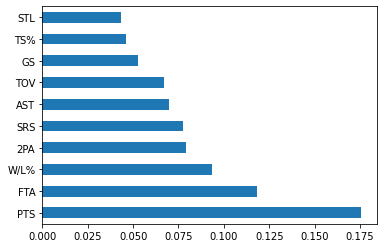

Age     0.032974
GS      0.052579
3PA     0.036979
2PA     0.079385
FTA     0.118176
TRB     0.042770
AST     0.070032
STL     0.043530
BLK     0.030985
TOV     0.067093
PF      0.032381
PTS     0.175615
W/L%    0.093687
SRS     0.077746
TS%     0.046068
dtype: float64


,PTS,FTA,W/L%,2PA,SRS,AST,TOV,GS,TS%,STL


In [ ]:
classRF = pd.DataFrame(columns = ["Age","GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"])

for x in range(0, 100):
  from sklearn.ensemble import RandomForestClassifier
  import matplotlib.pyplot as plt
  X = df[["Age","GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"]]
  model = RandomForestClassifier()
  model.fit(X,y)

  classRF.loc[x] =  model.feature_importances_.tolist()

feat_importances = classRF.mean(axis=0)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(classRF.mean(axis=0))

col_name = pd.DataFrame(columns = classRF.mean(axis=0).sort_values(ascending=False).head(10).keys()) #ugliest code I've written in my LIFE 3:25am
col_name

#Get column names of top 10 most important variables
Run loop 500 times to get average

---



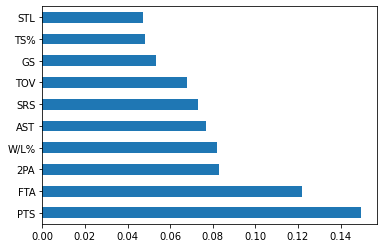

Age     0.037157
GS      0.053584
3PA     0.040859
2PA     0.082742
FTA     0.121754
TRB     0.044941
AST     0.077004
STL     0.047322
BLK     0.036571
TOV     0.068005
PF      0.036902
PTS     0.149673
W/L%    0.082117
SRS     0.073004
TS%     0.048365
dtype: float64


,PTS,FTA,2PA,W/L%,AST,SRS,TOV,GS,TS%,STL


In [ ]:
classvalsdf = pd.DataFrame(columns = ["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"])


for x in range(0, 1):
  from sklearn.ensemble import ExtraTreesClassifier
  import matplotlib.pyplot as plt
  X = df[["Age", "GS","3PA","2PA","FTA","TRB","AST","STL","BLK","TOV","PF","PTS","W/L%","SRS","TS%"]]
  model = ExtraTreesClassifier()
  model.fit(X,y)

  classvalsdf.loc[x] =  model.feature_importances_.tolist()

feat_importances = classvalsdf.mean(axis=0)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(classvalsdf.mean(axis=0))

col_name = pd.DataFrame(columns = classvalsdf.mean(axis=0).sort_values(ascending=False).head(10).keys()) #ugliest code I've written in my LIFE 3:25am
col_name

# Run a For Loop

In [ ]:
acc = 0
inacc= 0
right0 = 0
right1 = 0
right2 = 0
wrong0 = 0
wrong1 = 0
wrong2 = 0
accuracy = 0

X = X[list(col_name)]
test2022 = test1[list(col_name)]

avg_df0 = pd.DataFrame(columns = [col_name])
avg_df1 = pd.DataFrame(columns = [col_name])
avg_df2 = pd.DataFrame(columns = [col_name])

prob22df_1 = pd.DataFrame(columns = [list(range(0,605))])
prob22df_2 = pd.DataFrame(columns = [list(range(0,605))])
                      
for x in range(0, 100):
  avg_list0 = []
  avg_list1 = []
  avg_list2 = []

  trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2)

  log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100000) #fit the model
  log_reg.fit(trainX, trainY)
  y_pred = log_reg.predict(testX)

  set(y_pred)

  from sklearn.metrics import accuracy_score
  acc += accuracy_score(testY, y_pred)
  inacc += 1-acc

  testX['Actual_MVP'] = testY
  testX['Predicted_MVP'] = y_pred #predY is the column formed by the model we trained. testY is the true label whether the particular play is MVP, non MVP, or MVP candidate.
  testX

  Player = []
  Year = []
  Team = []
  for row in testX.index:
    Player.append(dict_player_index[row])
    Year.append(dict_year_index[row])
    Team.append(dict_team_index[row])

  testX["Player"] = Player
  testX["Team"] = Team
  testX["Year"] = Year

  import numpy as np
  misclassified = testX.iloc[np.where(testX.Actual_MVP != testX.Predicted_MVP)]
  len(misclassified)
  accurated_classified = testX.iloc[np.where(testX.Actual_MVP == testX.Predicted_MVP)]

  misclassified_0 = misclassified.iloc[np.where(misclassified.Actual_MVP == 0)]
  misclassified_1 = misclassified.iloc[np.where(misclassified.Actual_MVP == 1)]
  misclassified_2 = misclassified.iloc[np.where(misclassified.Actual_MVP == 2)]
  accurated_classified_0 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 0)]
  accurated_classified_1 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 1)]
  accurated_classified_2 = accurated_classified.iloc[np.where(accurated_classified.Actual_MVP == 2)]

  wrong0 += len(misclassified_0)
  wrong1 += len(misclassified_1)
  wrong2 += len(misclassified_2)
  right0 += len(accurated_classified_0)
  right1 += len(accurated_classified_1)
  right2 += len(accurated_classified_2)


  for i in accurated_classified_0.columns[0:10]:
    avg_list0.append(accurated_classified_0[i].mean()) #create a list 
    avg_list1.append(accurated_classified_1[i].mean())
    avg_list2.append(accurated_classified_2[i].mean())
  
  avg_df0.loc[x] = avg_list0
  avg_df1.loc[x] = avg_list1
  avg_df2.loc[x] = avg_list2 #will eventually take a sum of each column then divide by number of row

  prob_test22 = log_reg.predict_proba(test2022)
  prob22_class1 = []
  prob22_class2 = []
  for j in range(len(prob_test22)):
    prob22_class1.append(prob_test22[j][1])
    prob22_class2.append(prob_test22[j][2])

  prob22df_1.loc[x] = prob22_class1
  prob22df_2.loc[x] = prob22_class2

  #print(avg_list0)
  #print(prob22df_1)


In [ ]:
stats2022 = stats2022[list(col_name)]
#print(type(prob22df_1.mean(axis=0)))
#print(prob22df_1.mean(axis=0))
#stats2022["MVP Probability"] = prob22df_1.mean(axis=0)

#playindex = pd.Series((i[0] for i in (range(0,605))))



In [ ]:
prob22MVP = pd.DataFrame(columns = ["MVP%", "Candidate%","Player"])
prob22Cand = pd.DataFrame(columns = [player22list])

prob22MVP["MVP%"] = prob22df_1.mean(axis=0)
prob22MVP["Candidate%"] = prob22df_2.mean(axis=0) + prob22df_1.mean(axis=0)
prob22MVP['Player'] = test1['Player'].values
print(prob22MVP)

stats2022['Index'] = (list(range(0,605)))

prob22MVP.reset_index()
print(prob22MVP)

stats2022
result = stats2022.join(prob22MVP, on=['Index'], how='inner').drop(["Index"], axis =1 )
result

             MVP%    Candidate%           Player
0    7.506177e-07  1.744189e-02     Aaron Gordon
1    2.342717e-12  1.698793e-05    Austin Rivers
2    1.756780e-13  4.190932e-06          Bol Bol
3    5.161969e-11  6.480152e-05     Bones Hyland
4    8.596084e-12  2.543957e-05      Bryn Forbes
..            ...           ...              ...
600  1.791768e-17  8.203766e-08     Micah Potter
601  8.295296e-17  2.049661e-07  Rodney McGruder
602  5.129483e-16  5.103338e-07        Saben Lee
603  5.836176e-11  2.895828e-04       Saddiq Bey
604  8.464675e-22  1.256714e-10   Trayvon Palmer

[605 rows x 3 columns]
             MVP%    Candidate%           Player
0    7.506177e-07  1.744189e-02     Aaron Gordon
1    2.342717e-12  1.698793e-05    Austin Rivers
2    1.756780e-13  4.190932e-06          Bol Bol
3    5.161969e-11  6.480152e-05     Bones Hyland
4    8.596084e-12  2.543957e-05      Bryn Forbes
..            ...           ...              ...
600  1.791768e-17  8.203766e-08     Micah Pot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,PTS,FTA,W/L%,2PA,SRS,AST,TOV,GS,TS%,STL,MVP%,Candidate%,Player
0,15.0,3.1,0.585,7.7,2.16,2.5,1.8,75,0.601733,0.6,7.506177e-07,1.744189e-02,Aaron Gordon
1,6.0,0.7,0.585,1.8,2.16,1.3,0.8,18,0.544662,0.8,2.342717e-12,1.698793e-05,Austin Rivers
2,2.4,0.4,0.585,1.6,2.16,0.4,0.3,0,0.578035,0.1,1.756780e-13,4.190932e-06,Bol Bol
3,10.1,1.8,0.585,3.1,2.16,2.8,1.2,4,0.555433,0.6,5.161969e-11,6.480152e-05,Bones Hyland
4,8.8,1.2,0.585,3.3,2.16,1.0,0.7,2,0.569358,0.3,8.596084e-12,2.543957e-05,Bryn Forbes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,4.0,0.7,0.280,3.0,-7.36,0.0,0.3,0,0.499002,0.3,1.791768e-17,8.203766e-08,Micah Potter
601,5.4,0.5,0.280,1.5,-7.36,0.9,0.5,2,0.584416,0.4,8.295296e-17,2.049661e-07,Rodney McGruder
602,5.6,1.9,0.280,3.2,-7.36,2.9,1.0,0,0.496806,1.0,5.129483e-16,5.103338e-07,Saben Lee
603,16.1,3.1,0.280,6.4,-7.36,2.8,1.2,82,0.527385,0.9,5.836176e-11,2.895828e-04,Saddiq Bey


In [ ]:
result.sort_values(by='MVP%', ascending=False).head(20)

,PTS,FTA,W/L%,2PA,SRS,AST,TOV,GS,TS%,STL,MVP%,Candidate%,Player
48,26.8,5.3,0.780,13.9,6.94,4.8,2.4,68,0.576791,1.1,0.212411,0.956715,Devin Booker
541,27.4,7.3,0.683,16.2,5.37,6.7,3.4,57,0.575340,1.2,0.203349,0.972692,Ja Morant
477,29.9,11.4,0.622,15.0,3.22,5.8,3.3,67,0.633045,1.1,0.199123,0.993778,Giannis Antetokounmpo
31,30.6,11.8,0.622,15.9,2.57,4.2,3.1,68,0.617135,1.1,0.157751,0.991717,Joel Embiid
463,28.4,7.5,0.634,12.8,3.12,8.7,4.5,65,0.570281,1.2,0.070662,0.940237,Luka Doncic
15,27.1,6.3,0.585,13.8,2.16,7.9,3.8,74,0.661880,1.5,0.053876,0.954619,Nikola Jokic
196,27.9,7.8,0.561,18.3,-0.38,4.9,2.4,76,0.590301,0.9,0.053068,0.954648,DeMar DeRozan
511,28.4,7.3,0.524,12.3,1.55,9.7,4.0,76,0.603947,0.9,0.034669,0.926479,Trae Young
272,29.9,7.4,0.537,14.8,0.82,6.4,3.5,55,0.634658,0.9,0.021849,0.859892,Kevin Durant
46,14.7,3.1,0.780,8.3,6.94,10.8,2.4,65,0.580385,1.9,0.020405,0.774862,Chris Paul


In [ ]:
result.sort_values(by='Candidate%', ascending=False).head(20)

,PTS,FTA,W/L%,2PA,SRS,AST,TOV,GS,TS%,STL,MVP%,Candidate%,Player
477,29.9,11.4,0.622,15.0,3.22,5.8,3.3,67,0.633045,1.1,0.199123,0.993778,Giannis Antetokounmpo
31,30.6,11.8,0.622,15.9,2.57,4.2,3.1,68,0.617135,1.1,0.157751,0.991717,Joel Embiid
541,27.4,7.3,0.683,16.2,5.37,6.7,3.4,57,0.575340,1.2,0.203349,0.972692,Ja Morant
48,26.8,5.3,0.780,13.9,6.94,4.8,2.4,68,0.576791,1.1,0.212411,0.956715,Devin Booker
196,27.9,7.8,0.561,18.3,-0.38,4.9,2.4,76,0.590301,0.9,0.053068,0.954648,DeMar DeRozan
15,27.1,6.3,0.585,13.8,2.16,7.9,3.8,74,0.661880,1.5,0.053876,0.954619,Nikola Jokic
463,28.4,7.5,0.634,12.8,3.12,8.7,4.5,65,0.570281,1.2,0.070662,0.940237,Luka Doncic
511,28.4,7.3,0.524,12.3,1.55,9.7,4.0,76,0.603947,0.9,0.034669,0.926479,Trae Young
272,29.9,7.4,0.537,14.8,0.82,6.4,3.5,55,0.634658,0.9,0.021849,0.859892,Kevin Durant
30,22.0,8.2,0.622,8.4,2.57,10.3,4.4,65,0.581764,1.3,0.007183,0.816808,James Harden


In [ ]:
result.loc[result['Player'] == "Rudy Gobert"]

,PTS,FTA,W/L%,2PA,SRS,AST,TOV,GS,TS%,STL,MVP%,Candidate%,Player
530,15.6,6.7,0.598,7.6,5.67,1.1,1.8,66,0.732532,0.7,0.000028,0.155145,Rudy Gobert


In [ ]:
bumtotal = right0 + wrong0
mvptotal = right1 + wrong1
candtotal = right1 + right2 + wrong1 + wrong2

candright = right1 + right2

print(right0)
print(bumtotal)

print(right1)
print(mvptotal)

print(candright)
print(candtotal)

140550
141272
110
319
2410
4028


In [ ]:
print(acc)
print(avg_df0)
print(avg_df1)
print(avg_df2)

98.3895388850654
         PTS       FTA      W/L%       2PA       SRS       AST       TOV  \
0  -0.066365 -0.085333 -0.025364 -0.056229 -0.027204 -0.055204 -0.069444   
1  -0.073128 -0.086944 -0.040234 -0.065964 -0.037531 -0.060830 -0.067493   
2  -0.090798 -0.087539 -0.003862 -0.084509 -0.006776 -0.109886 -0.097487   
3  -0.079674 -0.102509 -0.010959 -0.078537 -0.014014 -0.050937 -0.062909   
4  -0.066438 -0.078188 -0.010906 -0.035789 -0.016936 -0.061220 -0.042097   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.089535 -0.095355 -0.028943 -0.075230 -0.023441 -0.053877 -0.068427   
96 -0.077838 -0.107918 -0.027440 -0.080046 -0.022491 -0.071437 -0.073134   
97 -0.093263 -0.094137 -0.009583 -0.088260 -0.022516 -0.076837 -0.091533   
98 -0.112297 -0.119935 -0.040318 -0.102346 -0.037206 -0.110691 -0.114128   
99 -0.136416 -0.124071 -0.074850 -0.126314 -0.059166 -0.094400 -0.090862   

          GS       TS%       STL  
0  -0.032101 -0.017008 -0.044479  


In [ ]:
type(log_reg)

print(log_reg.coef_)
print()
print(log_reg.intercept_)


#pred2022 = log_reg.predict(test2022)

[[-0.9574796  -0.56043865 -1.44384587 -0.96116356 -0.60815818 -0.70514994
   0.25489696 -0.57888404 -1.16854983 -0.01655765]
 [ 1.2623909   0.50365183  1.46463819  0.95206994  0.89862783  0.68153476
  -0.33924792  0.13713952  0.93599968 -0.00292727]
 [-0.3049113   0.05678681 -0.02079232  0.00909362 -0.29046965  0.02361519
   0.08435096  0.44174451  0.23255016  0.01948492]]

[ 11.77331255 -13.34015113   1.56683858]


#Create a plot
need divide the values in avg_list by n(number of times we run regression)

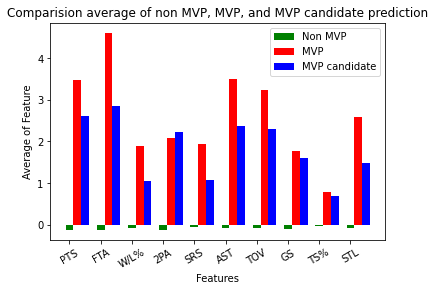

In [ ]:
import matplotlib.pyplot as plt
N = 10
ind = np.arange(N) 
width = 0.25
  
bar1 = plt.bar(ind, avg_list0 , width, color = 'g')
  
bar2 = plt.bar(ind+width, avg_list1, width, color='r')
  
bar3 = plt.bar(ind+width*2, avg_list2, width, color = 'b')
  
plt.xlabel("Features")
plt.ylabel('Average of Feature')
plt.title("Comparision average of non MVP, MVP, and MVP candidate prediction")
  
plt.xticks(np.arange(10),accurated_classified.columns[0:10], rotation = 30)
plt.legend( (bar1, bar2, bar3), ('Non MVP', 'MVP', 'MVP candidate') )
plt.show()

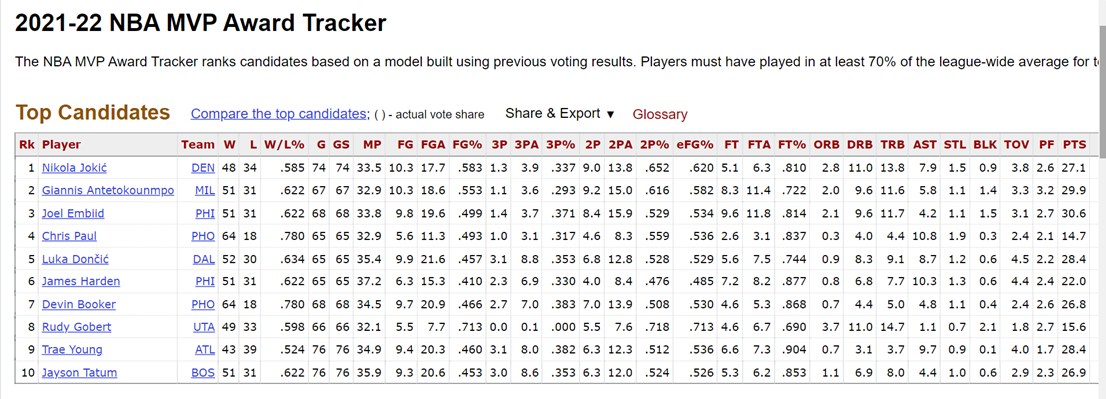